In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Force download to local folder so Jupyter can always find them
nltk.download('punkt', download_dir='./nltk_data')
nltk.download('stopwords', download_dir='./nltk_data')

# Add that path to search
nltk.data.path.append('./nltk_data')

# Verify stopwords work
stop_words = set(stopwords.words('english'))
print("NLTK resources loaded successfully!")


NLTK resources loaded successfully!


[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
print("--- 1. Loading Data ---")

try:
    # Skip malformed header and assign column names
    df = pd.read_csv("sentiment-analysis.csv", skiprows=1, header=None)
    df.columns = ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']
except FileNotFoundError:
    print("Error: 'sentiment-analysis.csv' not found. Upload it to your notebook working directory.")
    raise

# Use only required columns
df = df[['Text', 'Sentiment']]

# Drop rows with missing values
df.dropna(subset=['Text', 'Sentiment'], inplace=True)

print("Data loaded and cleaned successfully.")
df.head()


--- 1. Loading Data ---
Data loaded and cleaned successfully.


,Text,Sentiment
0,I love this product!,Positive
1,The service was terrible.,Negative
2,This movie is amazing!,Positive
3,I'm so disappointed with their customer support.,Negative
4,Just had the best meal of my life!,Positive


In [4]:
print("\n--- 2. Preprocessing Text ---")

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.strip('"').lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_text'] = df['Text'].apply(preprocess_text)

print("Text preprocessing complete.")
df[['Text', 'processed_text']].head()



--- 2. Preprocessing Text ---
Text preprocessing complete.


,Text,processed_text
0,I love this product!,love product
1,The service was terrible.,service terrible
2,This movie is amazing!,movie amazing
3,I'm so disappointed with their customer support.,im disappointed customer support
4,Just had the best meal of my life!,best meal life


In [5]:
print("\n--- 3. Extracting Features with TF-IDF ---")

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['Sentiment']

print(f"Feature matrix created with shape: {X.shape}")



--- 3. Extracting Features with TF-IDF ---
Feature matrix created with shape: (96, 229)


In [6]:
print("\n--- 4. Training Logistic Regression Model ---")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully!")



--- 4. Training Logistic Regression Model ---
Model trained successfully!



--- 5. Evaluating the Model ---
Accuracy: 85.00%

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.67      0.80         9
    Positive       0.79      1.00      0.88        11

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20


Confusion Matrix:


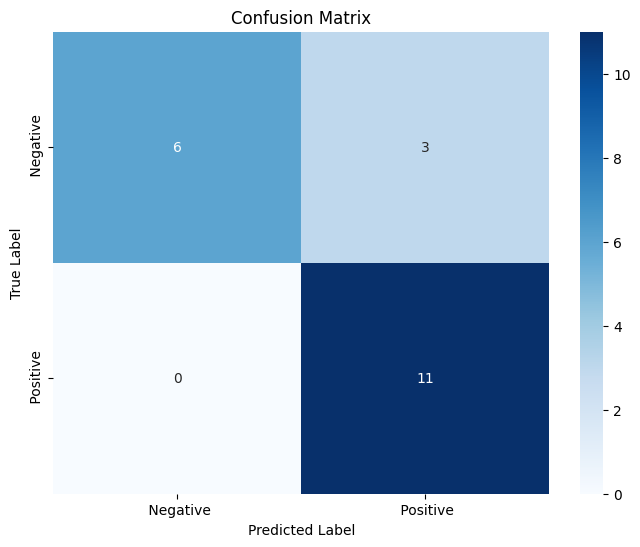

In [7]:
print("\n--- 5. Evaluating the Model ---")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [8]:
print("\n--- 6. Making Predictions on New Feedback ---")

def predict_sentiment(new_review):
    processed_review = preprocess_text(new_review)
    vectorized_review = vectorizer.transform([processed_review]).toarray()
    return model.predict(vectorized_review)[0]

review1 = "This movie was fantastic, I would highly recommend it to everyone!"
review2 = "I am so disappointed with their customer support, it was a terrible experience."

print(f"Review: '{review1}'\nPredicted Sentiment: {predict_sentiment(review1)}\n")
print(f"Review: '{review2}'\nPredicted Sentiment: {predict_sentiment(review2)}")



--- 6. Making Predictions on New Feedback ---
Review: 'This movie was fantastic, I would highly recommend it to everyone!'
Predicted Sentiment:  Positive

Review: 'I am so disappointed with their customer support, it was a terrible experience.'
Predicted Sentiment:  Negative
